In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from backtest import executer
import matplotlib.pyplot as plt
import plotly.express as px
import math

In [2]:
df = pd.read_csv('backtest.csv')

In [5]:
def result_calculator(row):

    result = (row['price_fst_stock'] - row['open_price_first_stock']) + (row['open_price_scnd_stock'] - row['price_scnd_stock'])
    
    if row['residual_open'] > row['std_open_residual']:
        result = - result

    return result 

In [ ]:
dfs = executer(n_workers=6)

  0%|          | 0/4371 [00:00<?, ?it/s]

In [ ]:
df_list = [pd.DataFrame(d) for d in dfs]
df = pd.concat(df_list)
df.head()

In [3]:
cond = (df.status.isin([True, 'close']))

In [6]:
df.loc[cond, 'result'] = df.loc[cond].apply(lambda row: result_calculator(row), axis=1)

In [7]:
result_sum = df.loc[cond].groupby('date').result.sum()

In [12]:
result_sum.describe()

count    724.000000
mean       0.936275
std       13.540624
min     -142.052017
25%       -3.328225
50%        0.877450
75%        5.244850
max      184.434900
Name: result, dtype: float64

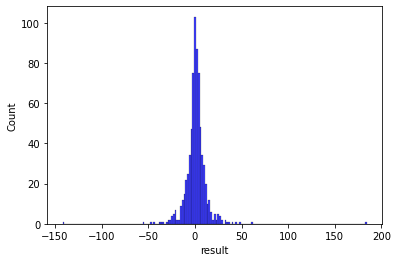

In [11]:
sns.histplot(x=result_sum, color='blue')

In [13]:
closed = df.loc[df.status=='close'].groupby('date').result.sum()

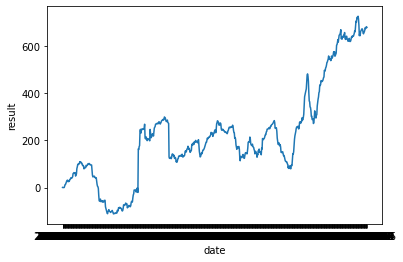

In [14]:
sns.lineplot(x=closed.index, y=closed.cumsum())

In [ ]:
result_sum

In [15]:
df.loc[df.status=='close'].result.sum()

677.8627512000005

In [16]:
final = df.groupby(['open_date', 'pair']).last().reset_index()

In [17]:
final_gpd = final.groupby('date').sum()

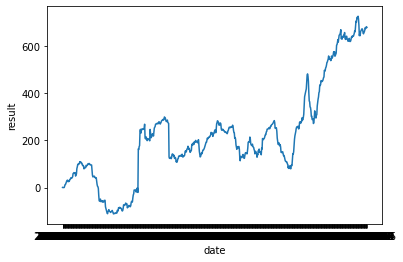

In [18]:
sns.lineplot(x=final_gpd.index, y=final_gpd.result.cumsum())

In [ ]:
final

In [ ]:
df.loc[df.status=='close']

In [ ]:
# df.drop(columns=['profit_loss', 'balance'],inplace=True)

In [116]:
result_sum = df.loc[cond].groupby(['date', 'status'], as_index=False).sum()
result_sum.index = pd.to_datetime(result_sum.index)

In [117]:
result_sum.loc[result_sum.status=='close', 'profit_loss'] =  result_sum.loc[result_sum.status=='close', 'result']   
result_sum.loc[result_sum.status==True, 'open'] =  result_sum.loc[result_sum.status==True, 'result'] 

In [118]:
result_sum['profit_loss'] = result_sum['profit_loss'].cumsum()

In [119]:
result_sum = result_sum.groupby('date').sum()
result_sum['profit_loss'] = result_sum['profit_loss'].replace(0, np.nan).fillna(method='ffill')

In [120]:
result_sum['balance'] = result_sum['open'] + result_sum['profit_loss']

In [131]:
result_sum.index = pd.to_datetime(result_sum.index)

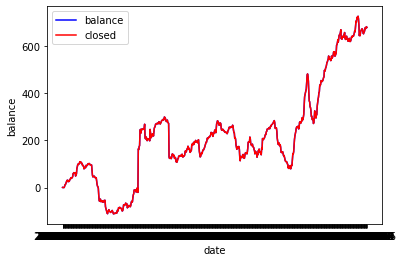

In [121]:
sns.lineplot(x=result_sum.index, y=result_sum.balance, color='blue', label='balance')
sns.lineplot(x=result_sum.index, y=result_sum.profit_loss, color='red', label='closed')


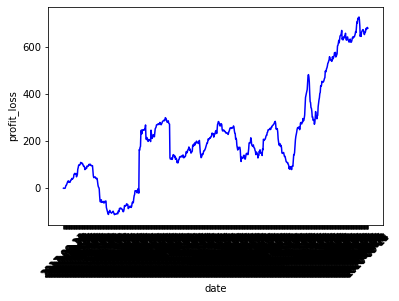

In [32]:
sns.lineplot(x=result_sum.index, y=result_sum.profit_loss, color='blue')
plt.xticks(rotation=45)
plt.show()

In [122]:
px.line(x=result_sum.index, y=result_sum.profit_loss)


In [123]:
px.histogram(df.loc[df.status=='close'].result)

In [239]:
bd = pd.read_excel("BD COMPLETO.xlsx")
bd.dropna(inplace=True)
bd.set_index('Data', inplace=True)

In [240]:
bd['log_ret'] = np.log(bd['BOVA11']/ bd['BOVA11'].shift())
bd

,ARZZ3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BOVA11,BRAP4,...,TAEE11,TIET11,VVAR3,YDUQ3,NTCO3,ITSA4,BPAC11,BOVV11,dol,log_ret
Data,,,,,,,,,,,,,,,,,,,,,
2017-04-11,28.5749,22.40,17.4028,28.1720,17.3703,17.6168,21.0011,9.78,62.42,17.2488,...,16.4007,10.4669,3.9803,14.2525,14.7845,6.8240,15.8492,64.46,3.531422,NaN
2017-04-12,28.5031,22.96,17.3301,27.7085,17.2553,17.4412,20.7890,9.87,61.68,16.2195,...,16.5075,10.3283,4.2291,14.5797,14.7213,6.7885,16.1625,64.00,3.519090,-0.011926
2017-04-13,28.7992,22.99,16.8300,26.2664,16.7844,16.9090,20.5403,9.95,60.80,16.3053,...,16.2939,10.3822,4.2291,13.9166,14.5948,6.6179,15.5868,62.93,3.536467,-0.014370
2017-04-17,28.6646,22.85,17.7756,27.4853,17.4415,17.6662,21.2791,10.00,62.25,16.5540,...,16.3865,10.4515,4.1793,14.7654,15.0277,6.7956,15.5783,64.44,3.483776,0.023569
2017-04-18,28.2609,23.91,17.9120,27.7514,17.4470,17.5619,21.2060,9.95,61.95,16.1166,...,16.5929,10.3052,4.3684,14.6769,14.9061,6.8525,15.2397,64.20,3.492744,-0.004831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-10,56.9600,26.10,56.0000,32.4254,19.3100,20.8500,26.2800,12.93,95.04,43.0300,...,28.7300,14.9000,18.0200,27.3100,49.7500,9.4600,79.1300,99.20,5.325000,-0.025555
2020-09-11,55.7500,26.58,56.0200,31.8971,18.8700,20.4600,25.4700,12.93,94.48,44.9000,...,28.3800,14.6500,17.9600,27.8900,51.6200,9.2700,78.1100,98.60,5.320500,-0.005910
2020-09-14,57.1700,28.25,58.7300,32.3600,19.1600,20.7000,25.8600,13.27,96.51,44.5500,...,28.6000,14.7700,18.3700,30.1100,53.2600,9.3800,81.4800,100.72,5.273000,0.021258


In [241]:
gpd = df.loc[df.status=='close'].groupby('date').sum().cumsum()
gpd.index = pd.to_datetime(gpd.index)

In [242]:
log_ret = bd.log_ret.rolling(103).std() * math.sqrt(252) * 100
bd['log_ret'] = log_ret
dd = gpd.join(bd, how='left')

In [243]:
dd.tail()

,Unnamed: 0,price_fst_stock,price_scnd_stock,beta,last_residual,std_residual,std_open_residual,residual_open,open_price_first_stock,open_price_scnd_stock,...,TAEE11,TIET11,VVAR3,YDUQ3,NTCO3,ITSA4,BPAC11,BOVV11,dol,log_ret
date,,,,,,,,,,,,,,,,,,,,,
2020-09-09,2023459,153315.2398,133838.780443,4598.712571,2438.870269,6027.001567,5508.004742,1587.831755,152065.9483,132933.602791,...,29.24,15.00,18.51,27.99,50.72,9.68,81.51,101.84,5.3125,27.819332
2020-09-10,2027911,153530.0298,134065.620443,4605.470703,2458.813394,6034.175484,5514.794709,1602.400746,152279.9083,133165.022891,...,28.73,14.90,18.02,27.31,49.75,9.46,79.13,99.20,5.3250,28.121526
2020-09-11,2033112,153700.4498,134203.500443,4609.935487,2463.226779,6040.043439,5520.014270,1607.310900,152451.1851,133304.013891,...,28.38,14.65,17.96,27.89,51.62,9.27,78.11,98.60,5.3205,28.080393
2020-09-14,2040552,154000.0398,134422.380443,4624.645357,2465.772731,6053.392315,5532.372547,1607.244930,152748.8051,133528.386891,...,28.60,14.77,18.37,30.11,53.26,9.38,81.48,100.72,5.2730,28.109877
2020-09-15,2045767,154226.1198,134554.700443,4643.035102,2468.318826,6064.113085,5542.253587,1601.723373,152973.6151,133665.316891,...,28.56,14.76,18.55,29.70,53.50,9.26,79.89,100.64,5.2780,28.052406


In [244]:
dd[['result', 'log_ret']].corr()

,result,log_ret
result,1.000000,0.723979
log_ret,0.723979,1.000000


In [245]:
px.line(dd[['result', 'log_ret']])

In [203]:
px.line(x=result_sum.index, y=result_sum.profit_loss)


In [196]:
bd.log_ret['2019'].std() * math.sqrt(252)

0.18208665089545323

In [193]:
(bd['BOVA11'] / bd['BOVA11'].shift()).std() * math.sqrt(252)

0.2925416460702591

In [179]:
bd['BOVA11'].pct_change()

Data
2017-04-11         NaN
2017-04-12   -0.011855
2017-04-13   -0.014267
2017-04-17    0.023849
2017-04-18   -0.004819
                ...   
2020-09-10   -0.025231
2020-09-11   -0.005892
2020-09-14    0.021486
2020-09-15   -0.000518
2020-09-16   -0.005702
Name: BOVA11, Length: 849, dtype: float64

In [ ]:
# Volatility
bd['log_ret'] = np.log(bd['BOVA11']/ bd['BOVA11'].shift())
anualized_vol = bd.log_ret.rolling(103).std() * math.sqrt(252) * 100
